Import **No-stacking** trajectory : 4arms@(30C,0.1M)-jun_10

In [2]:
import numpy as np
import pickle
pa_ls = pickle.load(open('D:\\Streaming-tmp\\dna\\dna4\\data\\composed_traj\\4arms-jun_10\\30C-0.1M-GPU\\4arms@(30C,0.1M)-jun_10.patp','rb')) # 4arms\\20C-0.5M-GPU\\4arms@(20C,0.5M) # 4arms-jun_10\\30C-0.1M-GPU\\4arms@(30C,0.1M)-jun_10
k2_ls = pickle.load(open('D:\\Streaming-tmp\\dna\\dna4\\data\\composed_traj\\4arms-jun_10\\30C-0.1M-GPU\\4arms@(30C,0.1M)-jun_10.k2tp','rb'))
non_stack_dict,stack_dict = pickle.load(open('D:\\Streaming-tmp\\dna\\dna4\\results\\4arms-jun_10\\pj\\pj_vtime-4arms@(30C,0.1M)-jun_10.stack','rb'))

Import **Stacking** trajectory : 4arms@(30C,0.5M)

In [2]:
import numpy as np
import pickle
pa_ls = pickle.load(open('D:\\Streaming-tmp\\dna\\dna4\\data\\composed_traj\\4arms\\30C-0.5M-GPU\\4arms@(30C,0.5M).patp','rb')) # 4arms\\20C-0.5M-GPU\\4arms@(20C,0.5M) # 4arms-jun_10\\30C-0.1M-GPU\\4arms@(30C,0.1M)-jun_10
k2_ls = pickle.load(open('D:\\Streaming-tmp\\dna\\dna4\\data\\composed_traj\\4arms\\30C-0.5M-GPU\\4arms@(30C,0.5M).k2tp','rb'))
non_stack_dict,stack_dict = pickle.load(open('D:\\Streaming-tmp\\dna\\dna4\\results\\4arms\\pj\\pj_vtime-4arms@(30C,0.5M).stack','rb'))
ns = pickle.load(open('D:\\Streaming-tmp\\dna\\dna4\\data\\composed_traj\\4arms\\30C-0.5M-GPU\\4arms@(30C,0.5M).ns','rb'))

In [44]:
import numpy as np
import pickle
pa_ls = pickle.load(open('D:\\Streaming-tmp\\dna\\dna4\\data\\composed_traj\\3arms-jun_0\\20C-0.1M-GPU\\3arms@(20C,0.1M)-jun_0.patp','rb')) # 4arms\\20C-0.5M-GPU\\4arms@(20C,0.5M) # 4arms-jun_10\\30C-0.1M-GPU\\4arms@(30C,0.1M)-jun_10
k2_ls = pickle.load(open('D:\\Streaming-tmp\\dna\\dna4\\data\\composed_traj\\3arms-jun_0\\20C-0.1M-GPU\\3arms@(20C,0.1M)-jun_0.k2tp','rb'))
non_stack_dict,stack_dict = pickle.load(open('D:\\Streaming-tmp\\dna\\dna4\\results\\3arms-jun_0\\pj\\pj_vtime-3arms@(20C,0.1M)-jun_0.stack','rb'))

Prepare data

In [3]:
from plot_tasks.ns_plots.ns_k2_plot import data_process_func as process_k2
from plot_tasks.ns_plots.ns_pa_plot import data_process_func as process_pa
pa_dict = process_pa(pa_ls, None, True)
k2_dict = process_k2(k2_ls, None, True)

Total time steps dropped: 0


In [2]:
import pickle
with open('D:/Streaming-tmp/dna/dna4/data/composed_traj/6arms-jun_1/20C-0.5M-GPU/6arms@(20C,0.5M)-jun_1.sitp', 'rb') as f:
    sitp = pickle.load(f)
print()
with open('D:\\Streaming-tmp\\dna\dna4\\results\\6arms-jun_1\\pj\\pj_vtime-6arms@(20C,0.5M)-jun_1.stack', 'rb') as f:
    nstk, stk = pickle.load(f)
print()

**Principal moments (Lambdas)**
Scatter, Heatmap, Contour, Gaussian-KDE Contour (Ongoing)

prepare data: l2 = lbd2/lbd1 ; l3 = lbd3/**lbd2**

In [5]:
lbd_axs_ls = k2_dict['axes']
lbd1_ls = []
l2_ls = []
l3_ls = []
for conf_lbd in lbd_axs_ls:
    (lbd1,axs1),(lbd2,axs2),(lbd3,axs3) = conf_lbd
    lbd1_ls.append(lbd1)
    l2_ls.append(lbd2/lbd1)
    l3_ls.append(lbd3/lbd2)
l2_arr = np.array(l2_ls)
l3_arr = np.array(l3_ls)


Scatter plot of lbd2/lbd1, lbd3/lbd2

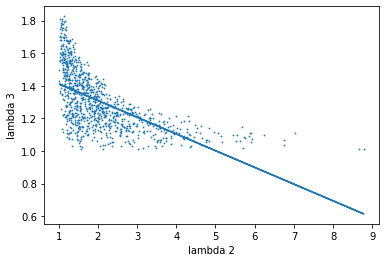

Slope = -0.103 ± 0.004 ; Intersect = 1.515 ± 0.010


In [6]:
import matplotlib.pyplot as plt
import scipy.stats as stat
ret_linreg = stat.linregress(l2_arr,l3_arr)
a = ret_linreg.slope
a_err = ret_linreg.stderr
b = ret_linreg.intercept
b_err = ret_linreg.intercept_stderr
plt.plot(l2_arr,a*l2_arr+b)
plt.scatter(l2_arr,l3_arr,s=0.6)
plt.xlabel('lambda 2')
plt.ylabel('lambda 3')
plt.show()
print(f'Slope = {a:.3f} ± {a_err:.3f} ; Intersect = {b:.3f} ± {b_err:.3f}')

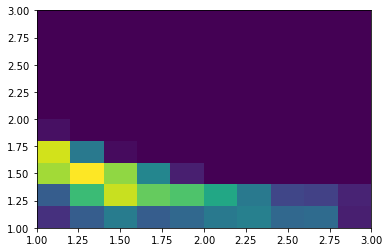

In [42]:
import matplotlib.pyplot as plt
plt.hist2d(l2_arr,l3_arr,bins=(30,30),range=np.array([[1,7],[1,7]]))
H, x_edges, y_edges = np.histogram2d(l2_arr,l3_arr,bins=(30,30),range=np.array([[1,7],[1,7]]))
plt.xlim((1,3))
plt.ylim((1,3))
plt.show()

In [31]:
x_edges[0:5]
H[0:10,0:10]

array([[  0.,   0.,   0.,   7.,   6.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  39.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   1.,  37.,  45.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   1., 126.,   1.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   7., 168.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  21., 114.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  73.,  36.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  70.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  60.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  32.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

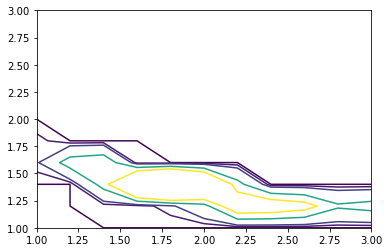

In [32]:
plt.contour(x_edges[:-1],y_edges[:-1],np.transpose(H),levels=[0,4,9,29,49])
plt.xlim((1,3))
plt.ylim((1,3))
plt.show()

Obtain example conformations, and convert their coordinates into **Principal-Axes Frame**

In [33]:
def get_rot_from_principal_axes(p_ax0,p_ax1,p_ax2):
    x = p_ax2
    y = p_ax1
    z = p_ax0
    x_unit = x/np.linalg.norm(x)
    y_unit = y/np.linalg.norm(y)
    z_unit = z/np.linalg.norm(z)
    rot_mat = np.vstack((x_unit,y_unit,z_unit)).T
    rot_mat = np.linalg.inv(rot_mat)
    return rot_mat

cnt = 0
t_ls = k2_dict['t']
for l2, l3 in zip(l2_ls, l3_ls):
    if l3 > 1.9 and l3 < 1.92 and l2 < 1.22 and l2 > 1.2:
        idx = l2_ls.index(l2)
        t = t_ls[idx]
        arm0_pos, arm1_pos = pa_dict[(0,1)][t][1]
        arm2_pos, arm3_pos = pa_dict[(2,3)][t][1]
        p_ax0_pos = lbd_axs_ls[idx][0][1]
        p_ax1_pos = lbd_axs_ls[idx][1][1]
        p_ax2_pos = lbd_axs_ls[idx][2][1]
        print(f'Ex. Index: {idx} , at time_step: {t}, l2_r = {l2:.3f} , l3_r = {l3:.3f}')
        print(f'Arm0_Pos: {arm0_pos} ; Arm1_Pos: {arm1_pos} ; Arm2_Pos: {arm2_pos} ; Arm3_Pos: {arm3_pos}') 
        print(f'P_AX0_pos: {p_ax0_pos} ; P_AX1_pos: {p_ax1_pos} ; P_AX2_pos: {p_ax2_pos}')
        rot_mat = get_rot_from_principal_axes(p_ax0_pos,p_ax1_pos,p_ax2_pos)
        arm0_pos = np.matmul(rot_mat,arm0_pos)
        arm1_pos = np.matmul(rot_mat,arm1_pos)
        arm2_pos = np.matmul(rot_mat,arm2_pos)
        arm3_pos = np.matmul(rot_mat,arm3_pos)
        print(f'Rotated. Arm0_Pos: {arm0_pos} ; Arm1_Pos: {arm1_pos} ; Arm2_Pos: {arm2_pos} ; Arm3_Pos: {arm3_pos}') 
        print(f'CHK: {np.matmul(rot_mat,p_ax0_pos)}')
        cnt += 1
        if cnt == 2:
            break

^^^ShortCut^^^ **Reset** l2 & l3 array

In [6]:
l2_arr = np.array(l2_ls)
l3_arr = np.array(l3_ls)

Define is_stack array : 1 stack or 2 stacks

In [98]:
is_containing_stack = np.array(stack_dict[(0,1)]['bool']) + np.array(stack_dict[(1,2)]['bool']) + np.array(stack_dict[(2,3)]['bool']) + np.array(stack_dict[(0,3)]['bool'])
is_containing_stack.sum()

936

In [103]:
number_stack = 2
is_containing_stack = (np.array(stack_dict[(0,1)]['bool'],dtype=int) + np.array(stack_dict[(1,2)]['bool'],dtype=int) + np.array(stack_dict[(2,3)]['bool'],dtype=int) + np.array(stack_dict[(0,3)]['bool'],dtype=int))==number_stack
is_containing_stack.sum()

640

Separate stacking / no stacking conformations out

In [85]:
l2_arr = l2_arr[is_containing_stack]
l3_arr = l3_arr[is_containing_stack]

In [99]:
l2_arr = l2_arr[~is_containing_stack]
l3_arr = l3_arr[~is_containing_stack]

Gaussian KDE Calculation: Z ~ density of data **(NOT NORMALIZED!!!)**

In [7]:
import scipy.stats as stat
xmin = 1
xmax = 3
ymin = 1
ymax = 2
X, Y = np.mgrid[xmin:xmax:3000j, ymin:ymax:3000j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([l2_arr, l3_arr])
kernel = stat.gaussian_kde(values,bw_method=0.2)
Z = np.reshape(kernel(positions).T, X.shape)
Z = np.rot90(Z)
X = np.rot90(X) # now: X[0,i]
Y = np.rot90(Y) # now: Y[j,0]

In [38]:
positions.shape

(1000, 1000)

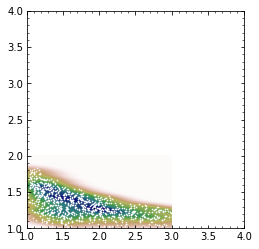

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(Z, cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.scatter(l2_arr, l3_arr, s=0.4,c='#FFFFFF')
ax.set_xlim([1, 4])
ax.set_ylim([1, 4])
# ax.set_title(f'Only confs w/ 2 stackings, {is_containing_stack.sum()} pts')
ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.tick_params(bottom=True,top=True,left=True,right=True,direction='in')
ax.tick_params(bottom=True,top=True,left=True,right=True,direction='in',which='minor')
plt.savefig('tmp.png',dpi=400)
plt.show()

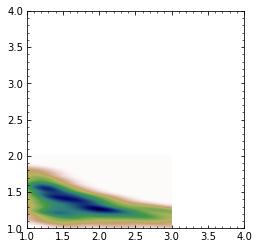

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(Z, cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
# ax.scatter(l2_arr, l3_arr, s=0.4,c='#FFFFFF')
ax.set_xlim([1, 4])
ax.set_ylim([1, 4])
# ax.set_title(f'Only confs w/ 1 stackings, {is_containing_stack.sum()} pts')
ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.tick_params(bottom=True,top=True,left=True,right=True,direction='in')
ax.tick_params(bottom=True,top=True,left=True,right=True,direction='in',which='minor')
plt.savefig('tmp.jpg',dpi=400)
plt.show()

Handcraft heatmap of **Probability** density

In [37]:
Z[998][998]

9.049833130706888e-11

Prominent Conformation Selection & Heatmap Ringing

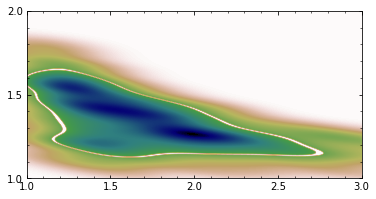

In [12]:
def generate_Z_layer(Z,prob,delta=0.05,is_FWHM=False):
    if is_FWHM:
        Z_threshold = (np.max(Z))/2 # delta at center now
    else:
        prob = 1-prob
        Z_sum = np.sum(Z)
        Z_thresholds_arr = np.linspace(np.min(Z),np.max(Z),1000)
        Z_threshold = 0
        for Z_th in Z_thresholds_arr:
            if np.sum(Z*(Z>Z_th)) / Z_sum <= prob: # integral of values above Z_th drops to 1-prob
                Z_threshold = Z_th
                break
    # Produce Z
    Z_sub = Z*(Z>Z_threshold-delta/2)
    Z_sub_ring = Z_sub*(~(Z_sub>Z_threshold+delta/2))
    return Z_sub_ring

# Z_base = (generate_Z_layer(Z,0.02).astype(bool))
# Z_50 = (generate_Z_layer(Z,0.50).astype(bool))
# Z_68 = (generate_Z_layer(Z,0.68).astype(bool))
# Z_95 = (generate_Z_layer(Z,0.95).astype(bool))
Z_FWHM = (generate_Z_layer(Z,0.95,is_FWHM=True).astype(bool))
Z_draw = Z_FWHM # Z_FWHM # Z_base + Z_50 + Z_68 + Z_95
Z_draw = Z*((~Z_draw).astype(int))
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(Z_draw, cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
# ax.scatter(l2_arr, l3_arr, s=0.4,c='#FFFFFF')
ax.set_xlim([1, 3])
ax.set_ylim([1, 2])
# ax.set_title(f'Only confs w/ 1 stackings, {is_containing_stack.sum()} pts')
ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.tick_params(bottom=True,top=True,left=True,right=True,direction='in')
ax.tick_params(bottom=True,top=True,left=True,right=True,direction='in',which='minor')
plt.savefig('tmp.jpg',dpi=400)
plt.show()

In [54]:
def if_in_ring(t):
    if t % 4 == 0:
        return False # # off ring
    elif t % 2 == 1:
        # print(pos)
        # print(i_x,i_y)
        # print(Z_ring[i_x,i_y])
        return False # on ring
    elif t % 2 == 0 and t % 4 == 2:
        return True # in ring
def check_if_in_ring(pos,Z_ring):
    # only a single ring!! Could support multiple rings if necessary: max_tree_depth. Now hardcoding to == 1.
    # locate the pos in mgrid
    dx = X[0,1]-X[0,0] # because of np.rot90
    dy = Y[1,0]-Y[0,0] # because of np.rot90
    i_x, i_y = (int((pos[0]-X[0,0])//dx), int((pos[1]-Y[0,0])//dy))
    if pos[0] > X[-1,-1] or pos[1] > Y[0,0]: # max at: X[-1,-1], Y[0,0]
        return False
    # count flip. cross a ring: False --> True --> False. top/right/bottom/left
    t = sum(Z_ring[:i_y, i_x][:-1] != Z_ring[:i_y, i_x][1:])
    l = sum(Z_ring[i_y, :i_x][:-1] != Z_ring[i_y, :i_x][1:])
    b = sum(Z_ring[i_y:, i_x][:-1] != Z_ring[i_y:, i_x][1:])
    r = sum(Z_ring[i_y, i_x:][:-1] != Z_ring[i_y, i_x:][1:])
    # check if trbl agree
    if if_in_ring(t)+if_in_ring(l)+if_in_ring(b)+if_in_ring(r) > 2:
        return True
    else:
        return False


conf_p_ls = [(l2_arr[i], l3_arr[i]) for i in range(len(l2_arr))]
# travel upward from l2
# for debug
# lx = []
# ly = []
# for pos in conf_p_ls:
#     if check_if_in_ring(pos, Z_FWHM):
#         lx.append(pos[0])
#         ly.append(pos[1])
# print(len(ly))
i_in_ring = np.array([i for i, pos in enumerate(conf_p_ls) if check_if_in_ring(pos, Z_FWHM)])
print(len(i_in_ring))

331


Priliminary Code for calculating Loss. ISSUE: Stk stat deviates from the result of population.

In [ ]:
import numpy as np
import pickle
# with open('tmp\\tmp_prom_sel_dict_FWHM.tmp','rb') as f:
#     summ_dic = pickle.load(f)
with open('tmp\\tmp_pop_plot_summ_dict.tmp','rb') as f:
    plot_summ_dic = pickle.load(f)
pop_summ_dic = {}
for cond in summ_dic:
    # summ_dic[cond]['stat'][np.isnan(summ_dic[cond]['stat'])] = 0
    pop_summ = plot_summ_dic[cond]
    pop_stk_prop = pop_summ.pop('prop_stacking')
    pa_stat_pop = np.zeros(5) # /lnk, unlnk, stk,/ lnk, unlnk/
    pa_dev_pop = np.zeros(5) # /lnk, unlnk, stk,/ lnk, unlnk/
    for ang_type in pop_summ:
        if pop_summ[ang_type] is None:
            continue
        n, m1, std, m3_s = pop_summ[ang_type]
        if ang_type == 'nonstacking':
            pa_stat_pop[0] = m1
            pa_dev_pop[0] = std
        elif ang_type == 'unlinked':
            pa_stat_pop[1] = m1
            pa_dev_pop[1] = std
        elif ang_type == 'stacking':
            pa_stat_pop[2] = m1
            pa_dev_pop[2] = std
        elif ang_type == 'no-stacking,linked':
            pa_stat_pop[3] = m1
            pa_dev_pop[3] = std
        elif ang_type == 'no-stacking,unlinked':
            pa_stat_pop[4] = m1
            pa_dev_pop[4] = std
        else:
            assert 0==1
    pop_summ_dic[cond] = {'stat' : pa_stat_pop}
    # summ_dic[cond]['stat_offset'] = pa_stat_pop - summ_dic[cond]['stat']
    # summ_dic[cond]['pop_dev'] = pa_dev_pop
# with open('tmp\\tmp_prom_sel_dict_FWHM-w_offset.tmp','wb') as f:
#     pickle.dump(summ_dic, f)
with open('tmp\\tmp_pop_summ_dict.tmp','wb') as f:
    pickle.dump(pop_summ_dic, f)

print()

In [56]:
# pa_ls # {time: ang_ls[(ang,is_stk,arm_idx,arm_vecs)]}
# pa_dict
# stack_dict # {arm_idx:{'bool', 't', 'val', 'raw'}}
# obtain the time stamps (lists preserve order)
t_arr = np.array(stack_dict[(0,1)]['t'])[i_in_ring]
mask = np.zeros(len(stack_dict[(0,1)]['t'])).astype(bool)
for idx in stack_dict:
    mask += np.array(stack_dict[idx]['bool'],dtype=bool)
pa_stat = np.zeros(5) # s*3, uns*2:  # /lnk, unlnk, stk,/ lnk, unlnk/
pa_cnt = np.zeros(5)
for iaidx, ia_dic in pa_dict.items():
    is_linked = ia_dic['is_sharing']
    for i, t in enumerate(t_arr):
        is_stk = stack_dict[iaidx]['bool'][i]
        ang = ia_dic[t][0]
        if mask[i]: # 2 or (2+1) branches; True: 2+1
            if is_stk: # 1
                pa_stat[2] += ang
                pa_cnt[2] += 1
            else: # 2
                if is_linked:
                    pa_stat[0] += ang
                    pa_cnt[0] += 1
                else:
                    pa_stat[1] += ang
                    pa_cnt[1] += 1
        else:
            if is_linked:
                pa_stat[3] += ang
                pa_cnt[3] += 1
            else:
                pa_stat[4] += ang
                pa_cnt[4] += 1
pa_stat = pa_stat/pa_cnt
loss = np.zeros(len(t_arr))
for iaidx, ia_dic in pa_dict.items():
    is_linked = ia_dic['is_sharing']
    for i, t in enumerate(t_arr):
        is_stk = stack_dict[iaidx]['bool'][i]
        ang = ia_dic[t][0]
        if mask[i]: # 2 or (2+1) branches; True: 2+1
            if is_stk: # 1
                loss[i] += (ang - pa_stat[2])**2
            else: # 2
                if is_linked:
                    loss[i] += (ang - pa_stat[0])**2
                else:
                    loss[i] += (ang - pa_stat[1])**2
        else:
            if is_linked:
                loss[i] += (ang - pa_stat[3])**2  
            else:
                loss[i] += (ang - pa_stat[4])**2
# loss = loss[loss != 0]
t_min = t_arr[np.argmin(loss)]
print(pa_ls[0][t_min])



# obtain the PA for the filtered conformations
# pa_sel = [(ang_ls[0], True if len(set(ns.arms[ang_ls[2][0]].strand_id_0,ns.arms[ang_ls[2][0]].strand_id_1,ns.arms[ang_ls[2][1]].strand_id_0,ns.arms[ang_ls[2][1]].strand_id_1)) < 4 else False) for t in t_ls for ang_ls in pa_ls[t]]
# pa_sel = [ang_ls for t in t_arr for ang_ls in pa_ls[t]]
print(k2_ls[0][1:])

C:\Users\wangd\AppData\Local\Temp\ipykernel_29296\990161670.py:34: RuntimeWarning: invalid value encountered in true_divide
  pa_stat = pa_stat/pa_cnt


[(107.56626115883324, True, (0, 1), (array([-2.12287521, -2.67107582,  2.0191555 ]), array([ 3.35577822, -1.89090014, -1.40246677]))), (130.95459482453487, True, (0, 2), (array([-2.12287521, -2.67107582,  2.0191555 ]), array([-0.1603694 ,  4.00319862, -0.02929449]))), (119.41726262766103, True, (1, 2), (array([ 3.35577822, -1.89090014, -1.40246677]), array([-0.1603694 ,  4.00319862, -0.02929449])))]
(0.2381172891049036, (3971.548433585135, 1366.667100025003, 2679.687362093074), (array([ 0.89204342,  0.43731376, -0.11408423]), array([ 0.42464072, -0.89741592, -0.11968677]), array([ 0.15472167, -0.05832098,  0.9862352 ])))


Random Pick (Deprecated)

In [10]:
rand_idx = np.floor(np.random.sample(50) * len(lx)).astype(int)
# check if the random ones have the same features (mean/std) of inter-arm angle as the population
# lx_c = np.array(lx)[rand_idx]
# ly_c = np.array(ly)[rand_idx]
i_sel = i_in_ring[rand_idx]
print(i_sel)

NameError: name 'lx' is not defined

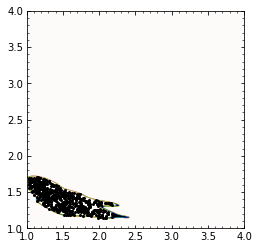

In [78]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# Z_corr = np.flip(Z_FWHM, axis=1)
ax.imshow(Z_FWHM, cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
# ax.imshow(Z_corr, cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
# i_x = 109
# i_y = 877
# i_x_max = len(X[0,:])
# i_y_max = len(Y[:,0])
# lx = [X[i_y,i_x]]
# ly = [Y[i_y,i_x]]
# lx.extend(X[i_y, :i_x])
# ly.extend(Y[i_y, :i_x])
# lx.extend(X[:i_y, i_x])
# ly.extend(Y[:i_y, i_x])
# lx.extend(X[i_y, i_x:])
# ly.extend(Y[i_y, i_x:])
# lx.extend(X[i_y:, i_x])
# ly.extend(Y[i_y:, i_x])

# for i in range(len(X[:,0])):
#     for j in range(len(Y[0,:])):
#         if Z_FWHM[i,j]:
#             lx.append(X[i,j])
#             ly.append(Y[i,j])
ax.scatter(lx,ly,s=4,c='#000000')
# ax.scatter(3.2055893854964124, 1.0234855613535052, s=40,c='#000000')
ax.set_xlim([1, 4])
ax.set_ylim([1, 4])
# ax.set_title(f'Only confs w/ 1 stackings, {is_containing_stack.sum()} pts')
ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.tick_params(bottom=True,top=True,left=True,right=True,direction='in')
ax.tick_params(bottom=True,top=True,left=True,right=True,direction='in',which='minor')
# plt.savefig('tmp.jpg',dpi=400)
plt.show()

Adding offset into the prom_sel_dict from main.py

In [24]:
import numpy as np
import pickle
with open('tmp\\tmp_prom_sel_dict_FWHM.tmp','rb') as f:
    summ_dic = pickle.load(f)
with open('tmp\\tmp_pop_plot_summ_dict.tmp','rb') as f:
    plot_summ_dic = pickle.load(f)
pop_summ_dic = {}
for cond in summ_dic:
    summ_dic[cond]['stat'][np.isnan(summ_dic[cond]['stat'])] = 0
    pop_summ = plot_summ_dic[cond]
    pop_stk_prop = pop_summ.pop('prop_stacking')
    pa_stat_pop = np.zeros(5) # /lnk, unlnk, stk,/ lnk, unlnk/
    pa_dev_pop = np.zeros(5) # /lnk, unlnk, stk,/ lnk, unlnk/
    for ang_type in pop_summ:
        if pop_summ[ang_type] is None:
            continue
        n, m1, std, m3_s = pop_summ[ang_type]
        if ang_type == 'nonstacking':
            pa_stat_pop[0] = m1
            pa_dev_pop[0] = std
        elif ang_type == 'unlinked':
            pa_stat_pop[1] = m1
            pa_dev_pop[1] = std
        elif ang_type == 'stacking':
            pa_stat_pop[2] = m1
            pa_dev_pop[2] = std
        elif ang_type == 'no-stacking,linked':
            pa_stat_pop[3] = m1
            pa_dev_pop[3] = std
        elif ang_type == 'no-stacking,unlinked':
            pa_stat_pop[4] = m1
            pa_dev_pop[4] = std
        else:
            assert 0==1
    pop_summ_dic[cond] = {'stat' : pa_stat_pop}
    summ_dic[cond]['stat_offset'] = pa_stat_pop - summ_dic[cond]['stat']
    summ_dic[cond]['pop_dev'] = pa_dev_pop
with open('tmp\\tmp_prom_sel_dict_FWHM-w_offset.tmp','wb') as f:
    pickle.dump(summ_dic, f)
with open('tmp\\tmp_pop_summ_dict.tmp','wb') as f:
    pickle.dump(pop_summ_dic, f)

print()

In [37]:
import numpy as np
import pickle
with open('tmp\\tmp_prom_sel_dict_FWHM-w_offset.tmp','rb') as f:
    summ_dic = pickle.load(f)
f = open('tmp\\tmp_prom_sel_dict_FWHM-offset_sanity_chk.txt', 'w')
f.write('Array: [linked_in_conf_w/_stk, unlinked_in_conf_w/_stk, stk_in_conf_w/_stk, linked_in_conf_w/o_stk, unlinked_in_conf_w/o_stk]\n')
f.write('True: Difference btw mean of population (1000 frames) and of conformations within FWHM ring is GREATER than 1 STD of population.\n')
f.write('Note: 3-arm NS only have linked arm pairs. 2nd and 5th of the array is thus ALWAYS FALSE.\n')
f.write('\n')
f.write('Report begins:\n')
for cond in summ_dic:
    arm,jun,temp,conc = cond
    summ = summ_dic[cond]
    chk = np.abs(summ['stat_offset']) - np.abs(summ['pop_dev']) > 0
    num_in_ring = summ['num_pts_inring']
    if any(chk):
        f.write(f'Arm {arm} , jxn {jun} , temp {temp} , conc {conc} : {num_in_ring} confs w/in FWHM ring ; mean_diff exceeding pop_STD: {chk}\n')
    else:
        f.write(f'Arm {arm} , jxn {jun} , temp {temp} , conc {conc} : {num_in_ring} confs w/in FWHM ring ; SAFE.\n')
f.close()

In [13]:
import numpy as np
import pickle
with open('tmp\\tmp_prom_sel_dict_FWHM-w_offset.tmp','rb') as f:
    summ_dic = pickle.load(f)
print()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
import os
import pickle
def misc():
    plot_summ_dic = {}
    arm_list = [3,4,5,6]
    jun_list = [0, 1, 2, 5, 10]
    for arm in arm_list:
        for jun in jun_list:
            if jun == 2:
                conc_list = [0.05, 0.1, 0.3, 0.5] # 0.05, 0.1, 0.3, 0.5
                temp_list = [20, 23, 27, 30, 40, 50] # 20, 23, 27, 30, 40, 50
            else:
                conc_list = [0.1, 0.5] # 0.05, 0.1, 0.3, 0.5
                temp_list = [20, 30] # 20, 23, 27, 30, 40, 50
            for temp in temp_list:
                for conc in conc_list:
                    if not (arm==4 and jun==0 and temp==30 and conc==0.1):
                        plot_summ_dic[(arm,jun,temp,conc)] = ns_time_summ_pa(arm, jun, temp, conc)
    # stacking_scatter_plot(plot_summ_dic)
    with open('tmp\\tmp_pop_plot_summ_dict.tmp','wb') as f:
        pickle.dump(plot_summ_dic,f)
    return True

def stacking_scatter_plot(plot_summ_dic):
    # f=open('tmp\\tmp.txt','a')
    row,col = (2,1)
    fig = plt.figure(figsize=(3*col+1,3.5*row))
    gs = fig.add_gridspec(row, col, hspace=0.3, wspace=0.1) # hspace=0.4, wspace=0.1
    axs = gs.subplots(sharex='col')
    # fig, axs = plt.subplots()
    jun_list = [0, 1, 2, 5, 10]
    conc_list = [0.05, 0.1, 0.3, 0.5] # 0.05, 0.1, 0.3, 0.5
    temp_list = [20, 23, 27, 30, 40, 50] # 20, 23, 27, 30, 40, 50
    markers = ['v', 's',  '*', 'o', 'p', '8', 'h', 'H', 'D', 'd', 'P', 'X']
    plotting_stacking_type = {'with_stacking':('stacking', 'nonstacking', 'unlinked'), 'linked': ('stacking', 'nonstacking', 'no-stacking,linked')}
    # different stacking types?
    cm_sub = np.linspace(0.2, 0.7, 6)
    cmap = plt.get_cmap('hot')
    colors = [cmap(x) for x in cm_sub]
    for cond, vals in plot_summ_dic.items():
        arm,jun,temp,conc = cond
        prop_stacking = vals['prop_stacking']
        del vals['prop_stacking']
        for stacking_type, summ in vals.items():
            if summ == None:
                continue
            freq, m1, std, m3_s = summ
            n = sum(freq)
            if jun == 2:
                conf_suffix = ''
            else:
                conf_suffix = f'-jun_{jun}'
            sp_suffix = ''
            # label = f'{arm}arms@({temp}C,{conc}M){conf_suffix}{sp_suffix}'
            # f.write(f'{label} , Type:{stacking_type} ~ Mean:{m1:.3f} ; STD:{std:.3f} ; #total:{n} ; is_stacking: {prop_stacking}\n')
            if stacking_type in plotting_stacking_type['with_stacking']:
                lw = 0.5
                # title = f'{arm}Arms, Mean and STD of Patch Angles when NS is stacking'
                if stacking_type in plotting_stacking_type['linked']:
                    axs[0].scatter(m1, std, color=colors[temp_list.index(temp)], marker=markers[conc_list.index(conc)], s=5*(jun+1), linewidth=lw, edgecolor='#000000')
                else:
                    axs[0].scatter(m1, std, color=colors[temp_list.index(temp)], marker=markers[conc_list.index(conc)], s=5*(jun+1), linewidth=lw, edgecolor=colors[temp_list.index(temp)], facecolors='none')
            else:
                lw = 0.5 # 0.2
                # title = f'{arm}Arms, Mean and STD of Patch Angles when NS is NOT stacking'
                if stacking_type in plotting_stacking_type['linked']:
                    axs[1].scatter(m1, std, color=colors[temp_list.index(temp)], marker=markers[conc_list.index(conc)], s=5*(jun+1), linewidth=lw, edgecolor='#000000')
                else:
                    axs[1].scatter(m1, std, color=colors[temp_list.index(temp)], marker=markers[conc_list.index(conc)], s=5*(jun+1), linewidth=lw, edgecolor=colors[temp_list.index(temp)], facecolors='none')
            # if stacking_type in plotting_stacking_type['linked']:
            #     ax.scatter(m1, std, color=colors[temp_list.index(temp)], marker=markers[conc_list.index(conc)], s=5*(jun+1), linewidth=lw, edgecolor='#000000')
            # else:
            #     ax.scatter(m1, std, color=colors[temp_list.index(temp)], marker=markers[conc_list.index(conc)], s=5*(jun+1), linewidth=lw, edgecolor=colors[temp_list.index(temp)], facecolors='none')
    axs[0].set_xlabel('Mean Patch Angle', fontsize=14) # r'$\mu(^\circ)$'
    axs[0].set_ylabel('Patch Angle Standard Deviation', fontsize=8) # r'$\sigma(^\circ)$'
    axs[0].xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter(u"{x:.0f}°"))
    axs[0].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter(u"{x:.0f}°"))
    axs[0].tick_params(bottom=True,top=True,left=True,right=True,direction='in')
    title = f'{arm}Arms, Mean and STD of Patch Angles when NS is stacking'
    axs[0].set_title(title, fontsize=8)
    axs[0].set_xlim((70,180))
    axs[0].set_ylim((10,50))

    axs[1].set_xlabel('Mean Patch Angle', fontsize=14) # r'$\mu(^\circ)$'
    axs[1].set_ylabel('Patch Angle Standard Deviation', fontsize=8) # r'$\sigma(^\circ)$'
    axs[1].xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter(u"{x:.0f}°"))
    axs[1].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter(u"{x:.0f}°"))
    axs[1].tick_params(bottom=True,top=True,left=True,right=True,direction='in')
    title = f'{arm}Arms, Mean and STD of Patch Angles when NS is NOT stacking'
    axs[1].set_title(title, fontsize=8)
    axs[1].set_xlim((70,180))
    axs[1].set_ylim((10,50))

    plt.savefig(f'tmp/{title}.png', dpi = 800)
    plt.close()
    return True

def ns_time_summ_pa(arms, jun, temp, conc):
    from plot_tasks.ns_plots.ns_pa_plot import data_process_func as pa_func
    stacking_options_ls = [('stacking', 'nonstacking', 'unlinked'),('no-stacking,unlinked','no-stacking,linked')] # 'stacking', 'nonstacking', 'unlinked', 'no-stacking,unlinked','no-stacking,linked', transiting?
    sp_suffix = ''
    conf_suffix = '' # -jun_10
    dims_ls = [20, 2, 7]
    ns_struc = get_params(arms)
    if jun == 2:
        conf_suffix = ''
    else:
        conf_suffix = f'-jun_{jun}'
        dims_ls[1] = jun
    # load data
    varname = 'pj'
    label = f'{arms}arms@({temp}C,{conc}M){conf_suffix}{sp_suffix}'
    loose_lbl = f'{temp}C-{conc}M-GPU{sp_suffix}'
    savepath = f'data/composed_traj/{arms}arms{conf_suffix}/{loose_lbl}/{label}'
    var_path = f'{savepath}.{varname}tp'
    path = f'results/{arms}arms{conf_suffix}/{varname}/{varname}_vtime-{label}.png'
    with open(os.path.splitext(path)[0]+'.stack','rb') as f:
        nonstacking_vtime_dic, stacking_vtime_dic = pickle.load(f)
    varname = 'pa'
    label = f'{arms}arms@({temp}C,{conc}M){conf_suffix}{sp_suffix}'
    loose_lbl = f'{temp}C-{conc}M-GPU{sp_suffix}'
    savepath = f'data/composed_traj/{arms}arms{conf_suffix}/{loose_lbl}/{label}'
    var_path = f'{savepath}.{varname}tp'
    path = f'results/{arms}arms{conf_suffix}/{varname}/{varname}_vtime-{label}.png'
    with open(var_path,'rb') as f:
        p_ang_ls_res = pickle.load(f)
    # re-organize pa_vtime_dic
    pa_vtime_dic = pa_func(p_ang_ls_res, None, vtime= True)
    # determine propensity to stack
    stk_cnt = 0
    for idx in ns_struc['PA']:
        stk_cnt += np.sum(np.array(stacking_vtime_dic[idx]['bool'],dtype=int))
    prop_stacking = stk_cnt/((ns_struc['#arm']//2)*len(stacking_vtime_dic[(0,1)]['t']))
    summ_dic = {'prop_stacking':prop_stacking} 
    for stacking_option in stacking_options_ls[0]:
        var_ls = create_var_ls(stacking_option,ns_struc,pa_vtime_dic,stacking_vtime_dic)
        summ_dic[stacking_option] = tmp_summ(var_ls, 36) if var_ls is not None else None # n, m1, std, m3_s
    for stacking_option in stacking_options_ls[1]:
        var_ls = create_var_ls(stacking_option,ns_struc,pa_vtime_dic,stacking_vtime_dic)
        summ_dic[stacking_option] = tmp_summ(var_ls, 36) if var_ls is not None else None # n, m1, std, m3_s
    return summ_dic

def create_var_ls(is_stacking,ns_struc,pa_vtime_dic,stacking_vtime_dic):
    var_ls = []
    mask = np.zeros(len(stacking_vtime_dic[(0,1)]['t'])).astype(bool)
    if is_stacking in ['unlinked', 'stacking', 'nonstacking']: # w/ stk
        for idx in ns_struc['PA']:
            mask += np.array(stacking_vtime_dic[idx]['bool'],dtype=bool)
        if np.sum(mask.astype(int)) < 100: # empirical!
            return None
        if is_stacking == 'unlinked':
            for idx in ns_struc['unlinked_PA']:
                var_ls.extend([pa_vtime_dic[idx][time][0] for time in stacking_vtime_dic[idx]['t']*mask.astype(int) if time != 0])
        elif is_stacking == 'stacking':
            for idx in ns_struc['linked_PA']:
                var_ls.extend([pa_vtime_dic[idx][time][0] for time in stacking_vtime_dic[idx]['t']*mask.astype(int)*np.array(stacking_vtime_dic[idx]['bool']).astype(int) if time != 0])
        elif is_stacking == 'nonstacking':
            for idx in ns_struc['linked_PA']:
                var_ls.extend([pa_vtime_dic[idx][time][0] for time in stacking_vtime_dic[idx]['t']*mask.astype(int)*(~np.array(stacking_vtime_dic[idx]['bool'])).astype(int) if time != 0])
    elif is_stacking in ['no-stacking,linked','no-stacking,unlinked']: # w/o stk
        for idx in ns_struc['PA']:
            mask += np.array(stacking_vtime_dic[idx]['bool'],dtype=bool)
        mask = ~mask
        if np.sum(mask.astype(int)) < 100: # empirical!
            return None
        if is_stacking == 'no-stacking,linked':
            for idx in ns_struc['linked_PA']:
                var_ls.extend([pa_vtime_dic[idx][time][0] for time in stacking_vtime_dic[idx]['t']*mask.astype(int) if time != 0])
        elif is_stacking == 'no-stacking,unlinked':
            for idx in ns_struc['unlinked_PA']:
                var_ls.extend([pa_vtime_dic[idx][time][0] for time in stacking_vtime_dic[idx]['t']*mask.astype(int) if time != 0])
    if len(var_ls) == 0:
        return None
    return var_ls
    # if is_stacking == 'unlinked':
    #     for iaidx in ns_struc['unlinked_PA']:
    #         var_ls.extend(stacking_vtime_dic[iaidx]['raw'])                        
    # elif is_stacking == 'no-stacking,unlinked':
    #     mask = np.zeros(len(stacking_vtime_dic[(0,1)]['bool']),dtype=bool) # generate mask from linked, not unlinked.
    #     for iaidx in ns_struc['linked_PA']:
    #         mask += np.array(stacking_vtime_dic[iaidx]['bool']) + np.array(nonstacking_vtime_dic[iaidx]['bool']) # exclude all frames with any stacking or nonstackings
    #     mask = ~mask
    #     for iaidx in ns_struc['unlinked_PA']:
    #         pa_ls = np.array(stacking_vtime_dic[iaidx]['raw'],dtype=float) * mask.astype(int)
    #         var_ls.extend(pa_ls[pa_ls!=0])
    # elif is_stacking == 'no-stacking,linked':
    #     for iaidx in ns_struc['linked_PA']:
    #         mask = ~(np.array(stacking_vtime_dic[iaidx]['bool']) + np.array(nonstacking_vtime_dic[iaidx]['bool']))
    #         pa_ls = np.array(stacking_vtime_dic[iaidx]['raw'],dtype=float) * mask.astype(int)
    #         var_ls.extend(pa_ls[pa_ls!=0])
    # else:
    #     for iaidx in ns_struc['linked_PA']:
    #         if is_stacking == 'stacking':
    #             pa_ls = np.array(stacking_vtime_dic[iaidx]['raw'],dtype=float) * np.array(stacking_vtime_dic[iaidx]['bool'],dtype=int)
    #         elif is_stacking == 'nonstacking':
    #             pa_ls = np.array(nonstacking_vtime_dic[iaidx]['raw'],dtype=float) * np.array(nonstacking_vtime_dic[iaidx]['bool'],dtype=int)
    #         else:
    #             assert 0==1
    #         var_ls.extend(pa_ls[pa_ls!=0])
    return var_ls

def tmp_summ(var_ls, bin_num):
    x_lim = (0,180)
    y_lim = (0,0.2)
    n,bin_edges = np.histogram(var_ls,bins = bin_num, range = x_lim)
    n, m1, std, m3_s = moments_calc(n, var_ls)
    return n, m1, std, m3_s

def get_params(arm_num):
    if arm_num == 3:
        ns_struc = {'#arm':3, 'linked_PA': [(0,1),(0,2),(1,2)], 'unlinked_PA': [], 'PA' : [(0,1),(0,2),(1,2)], 'pairing_linked':[((0,1),(2,3)),((0,3),(1,2))], 'pairing_unlinked':[((0,2),(1,3))]}
    elif arm_num == 4:
        ns_struc = {'#arm':4, 'linked_PA': [(0,1),(0,3),(1,2),(2,3)], 'unlinked_PA': [(0,2),(1,3)], 'PA': [(0,1),(0,3),(1,2),(2,3),(0,2),(1,3)], 'pairing_linked':[((0,1),(2,3)),((0,3),(1,2))], 'pairing_unlinked':[((0,2),(1,3))]}
    elif arm_num == 5:
        ns_struc = {'#arm':5, 'linked_PA': [(0,1),(0,4),(1,2),(2,3),(3,4)], 'unlinked_PA': [(0,2),(1,3),(2,4),(0,3),(1,4)], 'PA' : [(0,1),(0,4),(1,2),(2,3),(3,4),(0,2),(1,3),(2,4),(0,3),(1,4)], 'pairing_linked':[((0,1),(2,3)),((0,3),(1,2))], 'pairing_unlinked':[((0,2),(1,3))]}
    elif arm_num == 6:
        ns_struc = {'#arm':6, 'linked_PA': [(0,1),(0,5),(1,2),(2,3),(3,4),(4,5)], 'unlinked_PA': [(0,2),(1,3),(2,4),(3,5),(0,3),(1,4),(2,5),(0,4),(1,5)], 'PA' : [(0,1),(0,5),(1,2),(2,3),(3,4),(4,5),(0,2),(1,3),(2,4),(3,5),(0,3),(1,4),(2,5),(0,4),(1,5)], 'pairing_linked':[((0,1),(2,3)),((0,3),(1,2))], 'pairing_unlinked':[((0,2),(1,3))]}
    return ns_struc

def moments_calc(n, var_ls):
    '''
    Calculate the 0th raw, 1st raw, 2nd central, and 3rd standardized moment of a given distribution.
    '''
    n = np.array(n)
    m0 = np.sum(n) # 0th unitless raw moment: integration
    m1 = np.sum(var_ls)/m0
    m2_c = stats.moment(var_ls, moment=2) # 2nd central moment: variance
    std = m2_c**0.5 # standard deviation
    m3_c = stats.moment(var_ls, moment=3) # 3rd central moment
    m3_s = m3_c / (std**3) # 3rd standardized moment: skewness
    return n, m1, std, m3_s

misc()

Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dropped: 0
Total time steps dro

True

*Import into MATLAB*

In [11]:
def get_rot_from_principal_axes(p_ax0,p_ax1,p_ax2):
    x = p_ax2
    y = p_ax1
    z = p_ax0
    x_unit = x/np.linalg.norm(x)
    y_unit = y/np.linalg.norm(y)
    z_unit = z/np.linalg.norm(z)
    rot_mat = np.vstack((x_unit,y_unit,z_unit)).T
    rot_mat = np.linalg.inv(rot_mat)
    return rot_mat

import pickle
with open('D:\\Streaming-tmp\\dna\\dna4\\tmp\\tmp_prom_sel_dict_FWHM-w_offset-stk_prop.tmp', 'rb') as f:
    FWHM_prom_dic = pickle.load(f)
import pandas as pd
from collections import OrderedDict
# csv = pd.DataFrame.from_dict(FWHM_prom_dic)
csv = pd.DataFrame(columns=['cond','a0','a1','a2','a3','a4','a5','s0','s1','s2','l1','l2','l3'])
for cond, data in FWHM_prom_dic.items():
    k2_ls = data['k2_ls']
    ang_ls = data['ang_ls']
    c = OrderedDict([('cond' , cond), ('l1' , k2_ls[1][0]), ('l2' , k2_ls[1][1]), ('l3' , k2_ls[1][2])])
    for ang, is_linked, (ia0,ia1), (a0_pos,a1_pos) in ang_ls:
        if f'a{ia0}' not in c:
            c[f'a{ia0}'] = np.matmul(get_rot_from_principal_axes(k2_ls[2][0], k2_ls[2][1], k2_ls[2][2]),a0_pos)
        if f'a{ia1}' not in c:
            c[f'a{ia1}'] = np.matmul(get_rot_from_principal_axes(k2_ls[2][0], k2_ls[2][1], k2_ls[2][2]),a1_pos)
    # forgot to log is_stacking... set to be True for now
    is_stk = True
    if is_stk:
        s_ls = data['pop_dev'][:3]
    else:
        s_ls = data['pop_dev'][3:]
    for i, s in enumerate(s_ls):
        c[f's{i}'] = s
    csv = pd.concat([csv,pd.Series(c)], ignore_index=True, axis=1)
csv.to_csv('tmp.csv')
print()

In [10]:
import numpy as np
pa_stat = np.zeros((5,1000))
pa_stat[4,999] = 1
pa_stat[4,992] = 8
pa_stat[4,993] = 8
pa_stat[4,994] = 8
np.sum(pa_stat, axis=1).shape
np.std(pa_stat[4][pa_stat[4]!=0])
len(np.zeros(5))

5

Patch-up the prom_conf results

In [4]:
import pickle
def load_data(arms, jun, temp, conc):
    sp_suffix = ''
    conf_suffix = '' # -jun_10
    dims_ls = [20, 2, 7]
    if jun == 2:
        conf_suffix = ''
    else:
        conf_suffix = f'-jun_{jun}'
        dims_ls[1] = jun
    # load data
    varname = 'pj'
    label = f'{arms}arms@({temp}C,{conc}M){conf_suffix}{sp_suffix}'
    loose_lbl = f'{temp}C-{conc}M-GPU{sp_suffix}'
    savepath = f'data/composed_traj/{arms}arms{conf_suffix}/{loose_lbl}/{label}'
    var_path = f'{savepath}.{varname}tp'
    path = f'results/{arms}arms{conf_suffix}/{varname}/{varname}_vtime-{label}.png'
    with open(os.path.splitext(path)[0]+'.stack','rb') as f:
        nonstacking_vtime_dic, stacking_vtime_dic = pickle.load(f)
    return stacking_vtime_dic
with open('D:\\Streaming-tmp\\dna\\dna4\\tmp\\tmp_prom_sel_dict_FWHM-w_offset-stk_prop.tmp', 'rb') as f:
    FWHM_prom_dic = pickle.load(f)
for cond in FWHM_prom_dic:
    arms, jun, temp, conc = cond
    stack_dict = load_data(arms, jun, temp, conc)
    i_loss_min = stack_dict[(0,1)]['t'].index(FWHM_prom_dic[cond]['t'])
    stk_dic = {}
    for idx in stack_dict:
        stk_dic[idx] = stack_dict[idx]['bool'][i_loss_min]    
    FWHM_prom_dic[cond]['stk_dic'] = stk_dic
with open('D:\\Streaming-tmp\\dna\\dna4\\tmp\\tmp_prom_sel_dict_FWHM-w_offset-stk_prop.tmp', 'wb') as f:
    pickle.dump(FWHM_prom_dic, f)


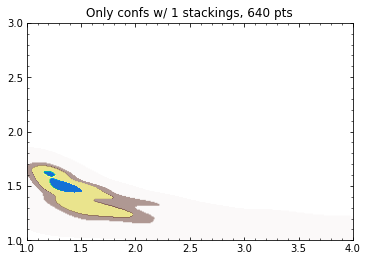

In [153]:
Z_draw[-1][-1] = 20
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(Z_draw, cmap=plt.cm.terrain_r,
          extent=[xmin, xmax, ymin, ymax])
# ax.scatter(l2_arr, l3_arr, s=0.4,c='#FFFFFF')
ax.set_xlim([1, 4])
ax.set_ylim([1, 3])
ax.set_title(f'Only confs w/ 1 stackings, {is_containing_stack.sum()} pts')
ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.tick_params(bottom=True,top=True,left=True,right=True,direction='in')
ax.tick_params(bottom=True,top=True,left=True,right=True,direction='in',which='minor')
plt.savefig('tmp.jpg',dpi=400)
plt.show()

**Patch Angles**
3D Scatter Plot

In [5]:
# pooling is wrong
ns_struc_4arm = {'linked_PA': [(0,1),(0,3),(1,2),(2,3)], 'unlinked_PA': [(0,2),(1,3)], 'pairing_linked':[((0,1),(2,3)),((0,3),(1,2))], 'pairing_unlinked':[((0,2),(1,3))]}
# S: linked, stacking
S_PA_arr = np.array([])
for idx_tp in ns_struc_4arm['linked_PA']: # pool
    S_PA_arr = np.hstack((S_PA_arr,np.array(stack_dict[idx_tp]['raw'])*np.array(stack_dict[idx_tp]['bool']))) 
# N: linked, not stacking
N_PA_arr = np.array([])
for idx_tp in ns_struc_4arm['linked_PA']: # pool
    N_PA_arr = np.hstack((N_PA_arr,np.array(non_stack_dict[idx_tp]['raw'])*np.array(non_stack_dict[idx_tp]['bool']))) 
# U: unlinked
U_PA_arr = np.array([])
for idx_tp in ns_struc_4arm['unlinked_PA']:
    U_PA_arr = np.hstack((U_PA_arr,np.array(stack_dict[idx_tp]['raw'])))

In [2]:
ns_struc_4arm = {'linked_PA': [(0,1),(0,3),(1,2),(2,3)], 'unlinked_PA': [(0,2),(1,3)], 'pairing_linked':[((0,1),(2,3)),((0,3),(1,2))], 'pairing_unlinked':[((0,2),(1,3))]}
is_stack_01 = stack_dict[(0,1)]['bool']
is_stack_12 = stack_dict[(1,2)]['bool']
is_stack_23 = stack_dict[(2,3)]['bool']
is_stack_03 = stack_dict[(0,3)]['bool']
t_ls = stack_dict[(0,1)]['t']
plot_S_ls = []
plot_N_ls = []
plot_U_ls = []
# plot a point, if 2 stacking happening
for t, is_S_01, is_S_12, is_S_23, is_S_03 in zip(t_ls,is_stack_01,is_stack_12,is_stack_23,is_stack_03):
    if is_S_01 and is_S_23:
        idx = t_ls.index(t)
        plot_S_ls.append(stack_dict[(0,1)]['raw'][idx])
        plot_S_ls.append(stack_dict[(2,3)]['raw'][idx])
        plot_N_ls.append(stack_dict[(0,3)]['raw'][idx])
        plot_N_ls.append(stack_dict[(1,2)]['raw'][idx])
        plot_U_ls.append(stack_dict[(0,2)]['raw'][idx])
        plot_U_ls.append(stack_dict[(1,3)]['raw'][idx])
    elif is_S_03 and is_S_12:
        idx = t_ls.index(t)
        plot_S_ls.append(stack_dict[(0,3)]['raw'][idx])
        plot_S_ls.append(stack_dict[(1,2)]['raw'][idx])
        plot_N_ls.append(stack_dict[(0,1)]['raw'][idx])
        plot_N_ls.append(stack_dict[(2,3)]['raw'][idx])
        plot_U_ls.append(stack_dict[(0,2)]['raw'][idx])
        plot_U_ls.append(stack_dict[(1,3)]['raw'][idx])

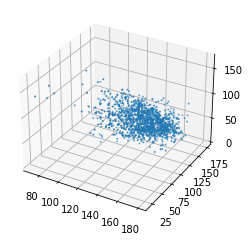

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.auto_scale_xyz([0, 180], [0, 180], [0, 180])
ax.scatter(plot_S_ls,plot_N_ls,plot_U_ls,s=1)
plt.show()

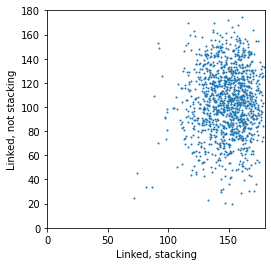

In [4]:
lim=(0,180)
plt.scatter(plot_S_ls,plot_N_ls,s=1)
plt.xlabel('Linked, stacking')
plt.ylabel('Linked, not stacking')
plt.xlim(lim)
plt.ylim(lim)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

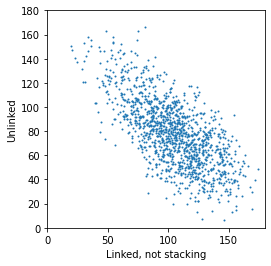

In [6]:
plt.scatter(plot_N_ls,plot_U_ls,s=1)
plt.xlabel('Linked, not stacking')
plt.ylabel('Unlinked')
plt.xlim(lim)
plt.ylim(lim)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

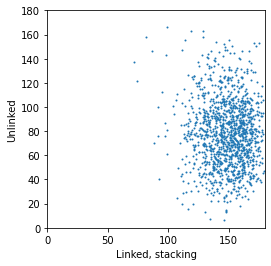

In [7]:
plt.scatter(plot_S_ls,plot_U_ls,s=1)
plt.xlabel('Linked, stacking')
plt.ylabel('Unlinked')
plt.xlim(lim)
plt.ylim(lim)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

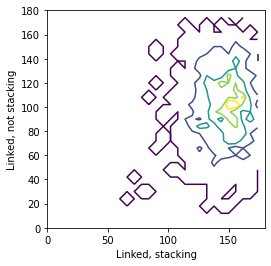

In [24]:
# plt.hist2d(plot_S_ls,plot_N_ls,bins=(90,90),range=np.array([[0,180],[0,180]]))
H, x_edges, y_edges = np.histogram2d(plot_S_ls,plot_N_ls,bins=(30,30),range=np.array([[0,180],[0,180]]))
plt.contour(x_edges[:-1],y_edges[:-1],np.transpose(H),[0,4,9,14,17])
plt.xlabel('Linked, stacking')
plt.ylabel('Linked, not stacking')
plt.xlim(lim)
plt.ylim(lim)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

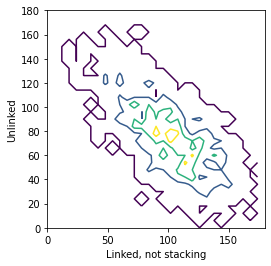

In [26]:
plt.xlabel('Linked, not stacking')
plt.ylabel('Unlinked')
H, x_edges, y_edges = np.histogram2d(plot_N_ls,plot_U_ls,bins=(30,30),range=np.array([[0,180],[0,180]]))
plt.contour(x_edges[:-1],y_edges[:-1],np.transpose(H),[0,4,9,14])
plt.xlim(lim)
plt.ylim(lim)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

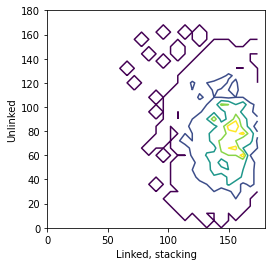

In [23]:
plt.xlabel('Linked, stacking')
plt.ylabel('Unlinked')
H, x_edges, y_edges = np.histogram2d(plot_S_ls,plot_U_ls,bins=(30,30),range=np.array([[0,180],[0,180]]))
plt.contour(x_edges[:-1],y_edges[:-1],np.transpose(H),[0,4,9,14,17])
plt.xlim(lim)
plt.ylim(lim)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()